<a href="https://colab.research.google.com/github/qlsflores/BaybayinHandwrittenDataset/blob/main/BaybayinwithQualifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image 
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

In [ ]:
!git clone https://github.com/qlsflores/Qualifier200

Cloning into 'Qualifier200'...
remote: Enumerating objects: 12702, done.
remote: Counting objects: 100% (12702/12702), done.
remote: Compressing objects: 100% (12699/12699), done.
remote: Total 12702 (delta 2), reused 12702 (delta 2), pack-reused 0
Receiving objects: 100% (12702/12702), 38.22 MiB | 33.39 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
dataset = '/content/Qualifier200/raw'

In [ ]:
input_shape = (64,64)
baybayin_chars = ["a","b","ba","bebi","bobu","d","dara","dedi","dodu","ei","g","ga","gegi","gogu","h","ha","hehi","hohu","k","ka","keki","koku",
      "l","la","leli","lolu","m","ma","memi","momu","n","na","neni","ng","nga","ngengi","ngongu","nonu","ou","p","pa","pepi","popu","s","sa","sesi",
      "sosu","t","ta","teti","totu","w","wa","wewi","wowu","y","ya","yeyi","yoyu"

  ]
print(len(baybayin_chars))

59


In [ ]:
chars_encoding = {}
for i in range(len(baybayin_chars)):
  chars_encoding[baybayin_chars[i]] = i
print(chars_encoding)

{'a': 0, 'b': 1, 'ba': 2, 'bebi': 3, 'bobu': 4, 'd': 5, 'dara': 6, 'dedi': 7, 'dodu': 8, 'ei': 9, 'g': 10, 'ga': 11, 'gegi': 12, 'gogu': 13, 'h': 14, 'ha': 15, 'hehi': 16, 'hohu': 17, 'k': 18, 'ka': 19, 'keki': 20, 'koku': 21, 'l': 22, 'la': 23, 'leli': 24, 'lolu': 25, 'm': 26, 'ma': 27, 'memi': 28, 'momu': 29, 'n': 30, 'na': 31, 'neni': 32, 'ng': 33, 'nga': 34, 'ngengi': 35, 'ngongu': 36, 'nonu': 37, 'ou': 38, 'p': 39, 'pa': 40, 'pepi': 41, 'popu': 42, 's': 43, 'sa': 44, 'sesi': 45, 'sosu': 46, 't': 47, 'ta': 48, 'teti': 49, 'totu': 50, 'w': 51, 'wa': 52, 'wewi': 53, 'wowu': 54, 'y': 55, 'ya': 56, 'yeyi': 57, 'yoyu': 58}


In [ ]:
def encode_label(label):
  return chars_encoding[label]

In [ ]:
def preprocess_image(filename):
  image_pil = Image.open(filename)
  image_np = np.asarray(image_pil)
  image_res = cv2.resize(image_np,(64,64))
  

  if len(image_res.shape) == 3:
    image_res = cv2.cvtColor(image_res, cv2.COLOR_BGR2GRAY)
  return image_res / 255

In [ ]:
def load_dataset(directory):
  Xraw = []
  Yraw = []

  for chars in baybayin_chars:
    for filename in os.listdir(directory + '/' + chars + '/' ):
      image_matrix = preprocess_image(directory + '/' + chars +'/' +filename)
      label_encoding = encode_label(chars)
      
      Xraw.append(image_matrix)
      Yraw.append(label_encoding)

  return Xraw, Yraw

In [ ]:
Xraw, Yraw = load_dataset(directory=dataset)

In [ ]:
def display_image(image):
  plt.figure()
  plt.imshow(image, cmap = 'gray')
  plt.grid(False)
  plt.show()

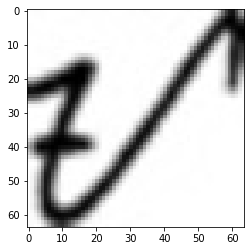

In [ ]:
display_image(Xraw[0])

In [ ]:
Xdata = np.asarray(Xraw)
Ydata = np.asarray(Yraw).reshape((-1,1))

In [ ]:
def one_hot_encoding(data):
  return OneHotEncoder().fit_transform(data).toarray()

In [ ]:
Ydata = one_hot_encoding(Ydata)
Ydata.shape

(12645, 59)

In [ ]:
def argmax(probability_logits):
  return np.argmax(probability_logits)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata,Ydata,test_size=0.20,random_state=0)

In [ ]:
print(Xdata.shape, Xtrain.shape, Xtest.shape)

(12645, 64, 64) (10116, 64, 64) (2529, 64, 64)


In [ ]:
print(Ytrain[1].shape)

(59,)


CNN MODEL

In [ ]:
def cnn_model():

  model=Sequential()
  model.add(Convolution2D(32 ,(3,3),(2,2), padding='same',activation='relu', input_shape=(64,64,1)))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(Convolution2D(64 ,(3,3),(2,2), padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
  model.add(Convolution2D(128 ,(3,3),(2,2), padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same'))


  
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(59, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [ ]:
import time

In [ ]:
start = time.time()
from keras import callbacks

model=cnn_model()
model.summary()



history = model.fit(Xtrain, Ytrain,epochs=100, validation_split=0.2, verbose =1)
print("Total time: ", time.time() - start, "seconds")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
train_acc = model.evaluate(Xtrain, Ytrain, verbose=0)
test_acc = model.evaluate(Xtest,Ytest,verbose=0)

In [ ]:
score= model.evaluate(Xtest, Ytest, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 7.28%


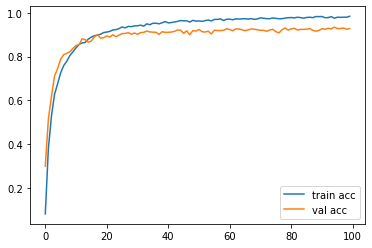

In [ ]:
# accuracies  ---- Accuracy of the model

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('baybayin_accuracy_model1.png')

plt.show()

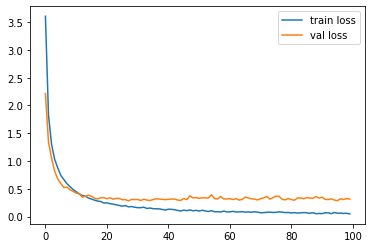

In [ ]:
# loss of the model
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('baybayin_loss_model1.png')
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(Xtest,Ytest,verbose=2)

80/80 - 1s - loss: 0.3128 - accuracy: 0.9272 - 702ms/epoch - 9ms/step


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:

# predict probabilities for test set
yhat_probs = model.predict(Xtest, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(Xtest, verbose=0)

yhat_classes = (model.predict(Xtest) > 0.5).astype("int32")

In [ ]:
#get classification report
print(classification_report(yhat_classes,Ytest))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        40
           1       0.85      0.90      0.88        51
           2       0.89      1.00      0.94        42
           3       0.97      1.00      0.99        36
           4       0.88      0.77      0.82        57
           5       0.96      1.00      0.98        47
           6       0.98      0.98      0.98        45
           7       1.00      1.00      1.00        47
           8       0.98      0.96      0.97        55
           9       1.00      1.00      1.00        37
          10       0.87      0.98      0.92        53
          11       0.92      0.95      0.93        37
          12       0.98      0.96      0.97        46
          13       0.98      0.89      0.93        46
          14       0.92      0.75      0.83        44
          15       0.94      0.89      0.91        35
          16       0.94      0.96      0.95        47
          17       0.91    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(Ytest.argmax(axis=1), yhat_classes.argmax(axis=1)))

[[36  0  0 ...  0  0  0]
 [ 1 46  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 3  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 1  0  0 ...  0  0 32]]


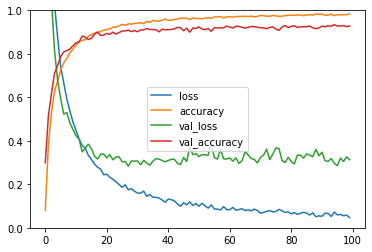

In [ ]:
pd.DataFrame(history.history).plot(ylim=(0,1))

In [ ]:
pred = model.predict(Xtest[np.newaxis,  1])

In [ ]:
pred

array([[2.35545978e-23, 1.46092074e-16, 5.61916168e-14, 7.56269148e-18,
        3.24978314e-18, 5.64712999e-10, 9.99909401e-01, 9.06490968e-05,
        2.23700480e-09, 1.06047441e-12, 5.50114223e-25, 5.81651316e-23,
        1.57968753e-22, 4.42679632e-29, 8.17047960e-19, 1.43962186e-12,
        2.09211627e-21, 9.39129913e-18, 2.13349029e-24, 1.70083482e-19,
        1.25189019e-18, 1.02777226e-24, 1.77894047e-27, 4.38136905e-29,
        6.46891501e-24, 3.30737967e-38, 4.50041940e-22, 1.80073599e-25,
        1.09744580e-20, 8.16006404e-22, 8.41816335e-29, 7.41314931e-29,
        2.36218028e-24, 2.56344074e-29, 2.49925252e-34, 4.50329568e-26,
        8.22948643e-31, 0.00000000e+00, 9.28333531e-19, 3.06249076e-24,
        4.76219642e-28, 1.39502223e-21, 1.45810435e-30, 1.58028924e-23,
        8.48923799e-29, 5.51227552e-25, 6.56658393e-29, 2.05839912e-15,
        2.57987998e-16, 6.54177177e-17, 8.42281430e-23, 8.06256442e-15,
        1.48377919e-13, 7.60090468e-16, 1.81150331e-19, 6.373476

In [ ]:
Predication = pred.argmax(axis=1)

6


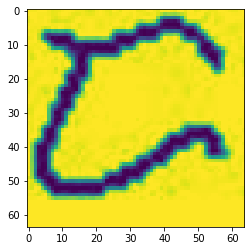

In [ ]:
print(Predication[0])
img=(Xtest[1]*255).reshape((64,64)).astype('uint8')
plt.imshow(img)

1


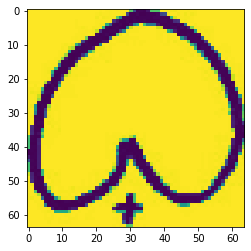

52


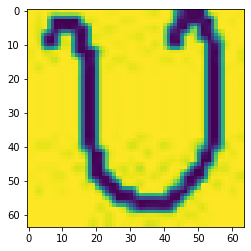

53


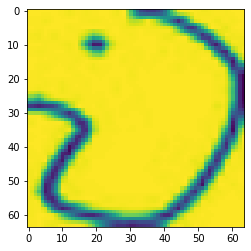

51


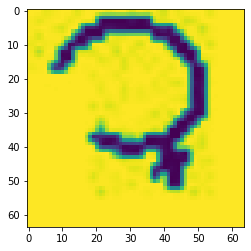

43


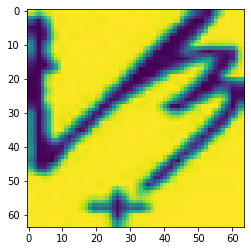

7


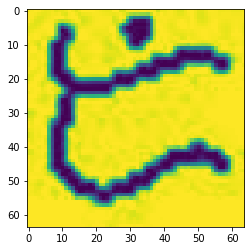

14


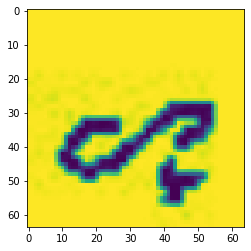

4


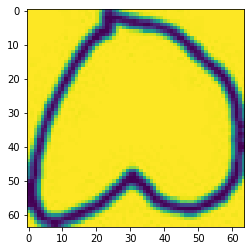

50


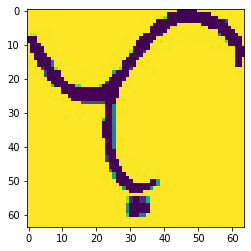

20


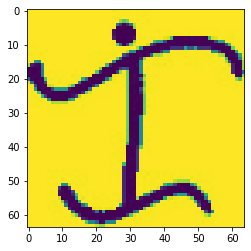

In [ ]:
for i in np.random.choice(np.arange(0,len(Ytest)), size = (10,)):
  pred = model.predict(Xtest[np.newaxis,i])
  predication = pred.argmax(axis=1)
  img = (Xtest[i]*255).reshape((64,64)).astype('uint8')
  print(predication[0])
  plt.imshow(img)
  plt.show()

In [ ]:
model.save('200_45epochs.h5')